# function

In [2]:
import sys
sys.path.append('../Library')

from data_prep import PreProcessor1

import library_leo as leo

# FEATURENUMBER =  '8'

In [3]:
FEATURENUMBER = '8'

In [4]:
# supppress warnings
import warnings
warnings.filterwarnings("ignore")
# install libraries
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from math import log

In [5]:
# get the data
train_path = "../Data/train_data.csv"
test_path = "../Data/test_data.csv"
# Replace 'Column29' with the actual column name that has mixed types
dtype = {'Column29': 'str'}

train = pd.read_csv(train_path, index_col='Claim Identifier',
                    dtype=dtype, low_memory=False)
test = pd.read_csv(test_path, index_col='Claim Identifier',
                   dtype=dtype, low_memory=False)

## generate majority target


In [6]:
train = train.dropna(subset=['Claim Injury Type'])
y = train['Claim Injury Type']
train = train.dropna(subset=['Claim Injury Type'])
y = train['Claim Injury Type']
y_str = y.str[:1]

In [7]:
# import one hot encoder
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
encoder.fit(y_str.values.reshape(-1,1))
y_hot = encoder.transform(y_str.values.reshape(-1,1)).toarray()
y_hot = pd.DataFrame(y_hot, columns=encoder.get_feature_names_out(['Claim Injury Type']), index = y_str.index)
y_hot.info()


<class 'pandas.core.frame.DataFrame'>
Index: 574026 entries, 5393875 to 6165075
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Claim Injury Type_1  574026 non-null  float64
 1   Claim Injury Type_2  574026 non-null  float64
 2   Claim Injury Type_3  574026 non-null  float64
 3   Claim Injury Type_4  574026 non-null  float64
 4   Claim Injury Type_5  574026 non-null  float64
 5   Claim Injury Type_6  574026 non-null  float64
 6   Claim Injury Type_7  574026 non-null  float64
 7   Claim Injury Type_8  574026 non-null  float64
dtypes: float64(8)
memory usage: 39.4 MB


In [8]:
y_int = y_str.astype(int)
X = train.drop(columns=['Claim Injury Type'])
# partition the data X, y and y_2bin
X_train, X_valid, y_hot_train,y_hot_valid = train_test_split(
    X, y_hot, test_size=0.2, random_state=0)

In [9]:
pr = PreProcessor1()
print("------------updates---------------------")
pr.update_casted_cols()
print("------------set_casting---------------------")
pr.set_castings(X_train)
print("------------pipeline---------------------")
df_train = pr.cast_pipeline(X_train)
print("df after cast_pipeline:", df_train.shape)
print("------------fillna---------------------")
pr.update_fillna_list(df_train)   
df_train = pr.fillna_pipeline(df_train)
print("df after fillna_pipeline:", df_train.shape)
print("------------transformation---------------------")
pr.set_transformations(df_train)
df_train = pr.transformation_pipeline(df_train)
print("df after transformation_pipeline:", df_train.shape)
df_train= pr.scaling_pipeline(df_train)
df_train = df_train.drop(columns=['Agreement Reached', 'WCB Decision'])
df_train.info() 

------------updates---------------------
------------set_casting---------------------
Columns that are not casted:
-WCB Decision: object
------------pipeline---------------------
Feature Carrier Type is already in scaling list
Feature Zip Code is already in scaling list
'Industry Code Description'
-Column Industry Code Description not found
df after cast_pipeline: (459220, 26)
------------fillna---------------------
extended fillna_list: [('Age at Injury', 'median'), ('Average Weekly Wage', 'median'), ('Birth Year', 'median'), ('IME-4 Count', 'median'), ('Industry Code', 'median'), ('WCIO Cause of Injury Code', 'median'), ('WCIO Nature of Injury Code', 'median'), ('WCIO Part Of Body Code', 'median'), ('Zip Code', 'median'), ('Agreement Reached', 'median'), ('Number of Dependents', 'median'), ('Accident Date', 'mode'), ('Alternative Dispute Resolution', 'mode'), ('Assembly Date', 'mode'), ('Attorney/Representative', 'mode'), ('C-2 Date', 'mode'), ('C-3 Date', 'mode'), ('Carrier Name', '

In [10]:
pr.update_status('valid')
print("------------updates---------------------")
pr.update_casted_cols()
print("------------set_casting---------------------")
pr.set_castings(X_valid)
print("------------pipeline---------------------")
df_valid = pr.cast_pipeline(X_valid)
print("df after cast_pipeline:", df_valid.shape)
print("------------fillna---------------------")
pr.update_fillna_list(df_valid)   
df_valid = pr.fillna_pipeline(df_valid)
print("df after fillna_pipeline:", df_valid.shape)
print("------------transformation---------------------")
pr.set_transformations(df_valid)
df_valid = pr.transformation_pipeline(df_valid)
print("df after transformation_pipeline:", df_valid.shape)
df_valid = pr.scaling_pipeline(df_valid)
df_valid = df_valid.drop(columns=['Agreement Reached', 'WCB Decision'])

df_valid.info()

------------updates---------------------
------------set_casting---------------------
Columns that are not casted:
-WCB Decision: object
------------pipeline---------------------
Feature Carrier Type is already in scaling list
Feature Zip Code is already in scaling list
'Industry Code Description'
-Column Industry Code Description not found
"['Industry Code Description'] not found in axis"
-Column Industry Code Description not found
"['OIICS Nature of Injury Description'] not found in axis"
-Column OIICS Nature of Injury Description not found
"['WCIO Cause of Injury Description'] not found in axis"
-Column WCIO Cause of Injury Description not found
"['WCIO Nature of Injury Description'] not found in axis"
-Column WCIO Nature of Injury Description not found
"['WCIO Part Of Body Description'] not found in axis"
-Column WCIO Part Of Body Description not found
'Industry Code Description'
-Column Industry Code Description not found
df after cast_pipeline: (114806, 26)
------------fillna----

In [11]:
df_valid.columns

Index(['Alternative Dispute Resolution', 'Attorney/Representative',
       'Carrier Name', 'Carrier Type', 'County of Injury',
       'COVID-19 Indicator', 'District Name', 'Gender', 'Medical Fee Region',
       'Zip Code', 'First Hearing Month', 'First Hearing Year', 'Gender_F',
       'Gender_M', 'Gender_U', 'Gender_X', 'Age at Injury',
       'Average Weekly Wage', 'Birth Year', 'IME-4 Count', 'Industry Code',
       'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code',
       'WCIO Part Of Body Code', 'Number of Dependents',
       'log_Average Weekly Wage', 'fe_Carrier Type', 'fe_Medical Fee Region',
       'fe_County of Injury', 'Age', 'C-2 Month', 'C-2 Year', 'C-3 Month',
       'C-3 Year', 'Accident Month', 'Accident Year', 'Assembly Month',
       'Assembly Year', 'fe_Industry Code', 'fe_WCIO Part Of Body Code',
       'fe_WCIO Nature of Injury Code', 'fe_Zip Code',
       'fe_WCIO Cause of Injury Code'],
      dtype='object')

In [12]:
X_valid

,Age at Injury,Alternative Dispute Resolution,Attorney/Representative,Average Weekly Wage,Birth Year,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,...,Accident Year,First Hearing Month,First Hearing Year,Assembly Month,Assembly Year,fe_Industry Code,fe_WCIO Part Of Body Code,fe_WCIO Nature of Injury Code,fe_Zip Code,fe_WCIO Cause of Injury Code
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
6143035,42,0,0,0.00,1980,AIU INSURANCE CO,1A,KINGS,0,NYC,...,2022,3,2023,11,2022,0.057609,0.057609,0.057609,0.057609,0.057609
5525593,59,0,1,848.59,1961,STATE INSURANCE FUND,2A,GENESEE,0,ROCHESTER,...,2020,2,2022,7,2020,0.029452,0.029452,0.029452,0.029452,0.029452
5539202,37,0,1,720.88,1982,HARTFORD ACCIDENT & INDEMNITY,1A,ORANGE,0,ALBANY,...,2020,11,2020,8,2020,0.007735,0.007735,0.007735,0.007735,0.007735
5578055,29,0,1,1150.00,1991,"POLICE, FIRE, SANITATION",3A,QUEENS,0,NYC,...,2020,5,2021,10,2020,0.013571,0.013571,0.013571,0.013571,0.013571
5473728,49,0,1,1612.57,1970,STATE INSURANCE FUND,2A,NASSAU,0,NYC,...,2020,1,2021,4,2020,0.064832,0.064832,0.064832,0.064832,0.064832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5744019,49,0,1,559.21,1971,STATE NATIONAL INSURANCE,1A,BRONX,0,NYC,...,2021,10,2021,6,2021,0.057609,0.057609,0.057609,0.057609,0.057609
5403940,23,0,1,603.89,1996,STATE NATIONAL INSURANCE,1A,BRONX,0,NYC,...,2019,5,2020,1,2020,0.029452,0.029452,0.029452,0.029452,0.029452
6090655,21,0,0,0.00,2001,AIU INSURANCE CO,1A,RENSSELAER,1,ALBANY,...,2022,2,2022,9,2022,0.043628,0.043628,0.043628,0.043628,0.043628


In [13]:
df_valid

,Alternative Dispute Resolution,Attorney/Representative,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,Gender,Medical Fee Region,Zip Code,...,C-3 Year,Accident Month,Accident Year,Assembly Month,Assembly Year,fe_Industry Code,fe_WCIO Part Of Body Code,fe_WCIO Nature of Injury Code,fe_Zip Code,fe_WCIO Cause of Injury Code
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
6143035,0,0,AIU INSURANCE CO,1A,KINGS,0,NYC,F,IV,11232,...,0.0,0.666667,0.5,0.666667,0.5,-0.143306,0.223301,-0.300414,28.104689,0.746019
5525593,0,1,STATE INSURANCE FUND,2A,GENESEE,0,ROCHESTER,M,I,14525,...,0.0,0.000000,-0.5,0.000000,-0.5,-0.360507,-0.218856,-0.427271,14.004362,0.000000
5539202,0,1,HARTFORD ACCIDENT & INDEMNITY,1A,ORANGE,0,ALBANY,M,III,10940,...,0.0,0.166667,-0.5,0.166667,-0.5,-0.528036,-0.559895,-0.525116,3.128680,-0.575410
5578055,0,1,"POLICE, FIRE, SANITATION",3A,QUEENS,0,NYC,M,IV,11436,...,-1.0,-0.500000,-0.5,0.500000,-0.5,-0.483017,-0.468249,-0.498823,6.051254,-0.420782
5473728,0,1,STATE INSURANCE FUND,2A,NASSAU,0,NYC,M,IV,11758,...,-1.0,-0.500000,-0.5,-0.500000,-0.5,-0.087586,0.336730,-0.267871,31.721919,0.937399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5744019,0,1,STATE NATIONAL INSURANCE,1A,BRONX,0,NYC,M,IV,10455,...,0.0,-0.333333,0.0,-0.166667,0.0,-0.143306,0.223301,-0.300414,28.104689,0.746019
5403940,0,1,STATE NATIONAL INSURANCE,1A,BRONX,0,NYC,M,III,10950,...,-1.0,0.833333,-1.0,-1.000000,-0.5,-0.360507,-0.218856,-0.427271,14.004362,0.000000
6090655,0,0,AIU INSURANCE CO,1A,RENSSELAER,1,ALBANY,M,I,12061,...,0.0,0.333333,0.5,0.333333,0.5,-0.251151,0.003762,-0.363401,21.103599,0.375606


In [14]:
X_valid.columns

Index(['Age at Injury', 'Alternative Dispute Resolution',
       'Attorney/Representative', 'Average Weekly Wage', 'Birth Year',
       'Carrier Name', 'Carrier Type', 'County of Injury',
       'COVID-19 Indicator', 'District Name', 'Gender', 'IME-4 Count',
       'Industry Code', 'Medical Fee Region', 'WCIO Cause of Injury Code',
       'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Zip Code',
       'Agreement Reached', 'WCB Decision', 'Number of Dependents',
       'log_Average Weekly Wage', 'fe_Carrier Type', 'fe_Medical Fee Region',
       'fe_County of Injury', 'Age', 'C-2 Month', 'C-2 Year', 'C-3 Month',
       'C-3 Year', 'Accident Month', 'Accident Year', 'First Hearing Month',
       'First Hearing Year', 'Assembly Month', 'Assembly Year',
       'fe_Industry Code', 'fe_WCIO Part Of Body Code',
       'fe_WCIO Nature of Injury Code', 'fe_Zip Code',
       'fe_WCIO Cause of Injury Code'],
      dtype='object')

In [15]:
"""pr.update_status('test')
print("------------updates---------------------")
pr.update_casted_cols()
print("------------set_casting---------------------")
pr.set_castings(test)
print("------------pipeline---------------------")
df_test = pr.cast_pipeline(test)
print("df after cast_pipeline:", df_test.shape)
print("------------fillna---------------------")
pr.update_fillna_list(df_test)   
df_test = pr.fillna_pipeline(df_test)
print("df after fillna_pipeline:", df_test.shape)
print("------------transformation---------------------")
pr.set_transformations(df_test)
df_test = pr.transformation_pipeline(df_test)
print("df after transformation_pipeline:", df_test.shape)
df_test = pr.scaling_pipeline(df_test)
#drop the columns 'Agreement Reached', 'WCB Decision'
df_valid = df_valid.drop(columns=['Agreement Reached', 'WCB Decision'])
df_test.info()"""

'pr.update_status(\'test\')\nprint("------------updates---------------------")\npr.update_casted_cols()\nprint("------------set_casting---------------------")\npr.set_castings(test)\nprint("------------pipeline---------------------")\ndf_test = pr.cast_pipeline(test)\nprint("df after cast_pipeline:", df_test.shape)\nprint("------------fillna---------------------")\npr.update_fillna_list(df_test)   \ndf_test = pr.fillna_pipeline(df_test)\nprint("df after fillna_pipeline:", df_test.shape)\nprint("------------transformation---------------------")\npr.set_transformations(df_test)\ndf_test = pr.transformation_pipeline(df_test)\nprint("df after transformation_pipeline:", df_test.shape)\ndf_test = pr.scaling_pipeline(df_test)\n#drop the columns \'Agreement Reached\', \'WCB Decision\'\ndf_valid = df_valid.drop(columns=[\'Agreement Reached\', \'WCB Decision\'])\ndf_test.info()'

# Pre SMOTE

In [15]:
num_cols = df_train.select_dtypes(include=['float64']).columns

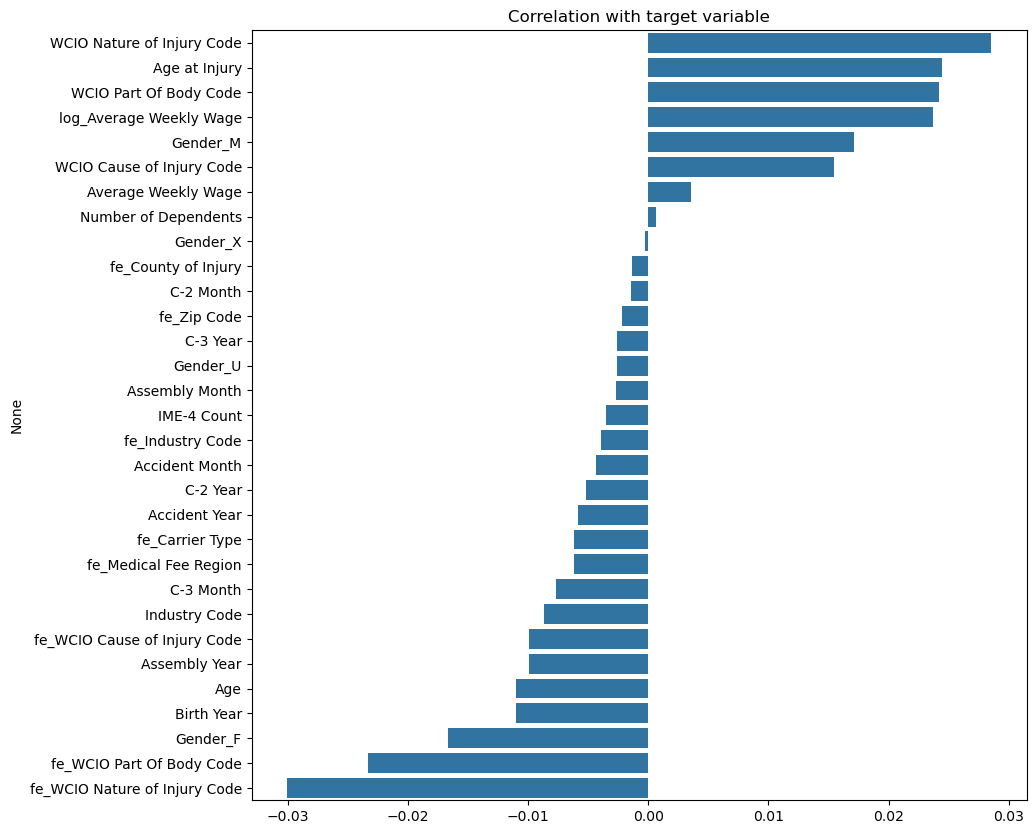

In [16]:
corr = []
for col in df_train[num_cols].columns:
    corr.append(df_train[col].corr(y_hot_train[f'Claim Injury Type_{FEATURENUMBER}']))
corr = pd.Series(corr, index=df_train[num_cols].columns)
corr = corr.sort_values(ascending=False)    

plt.figure(figsize=(10, 10))
sns.barplot(x=corr.values, y=corr.index)
plt.title('Correlation with target variable')
plt.show()


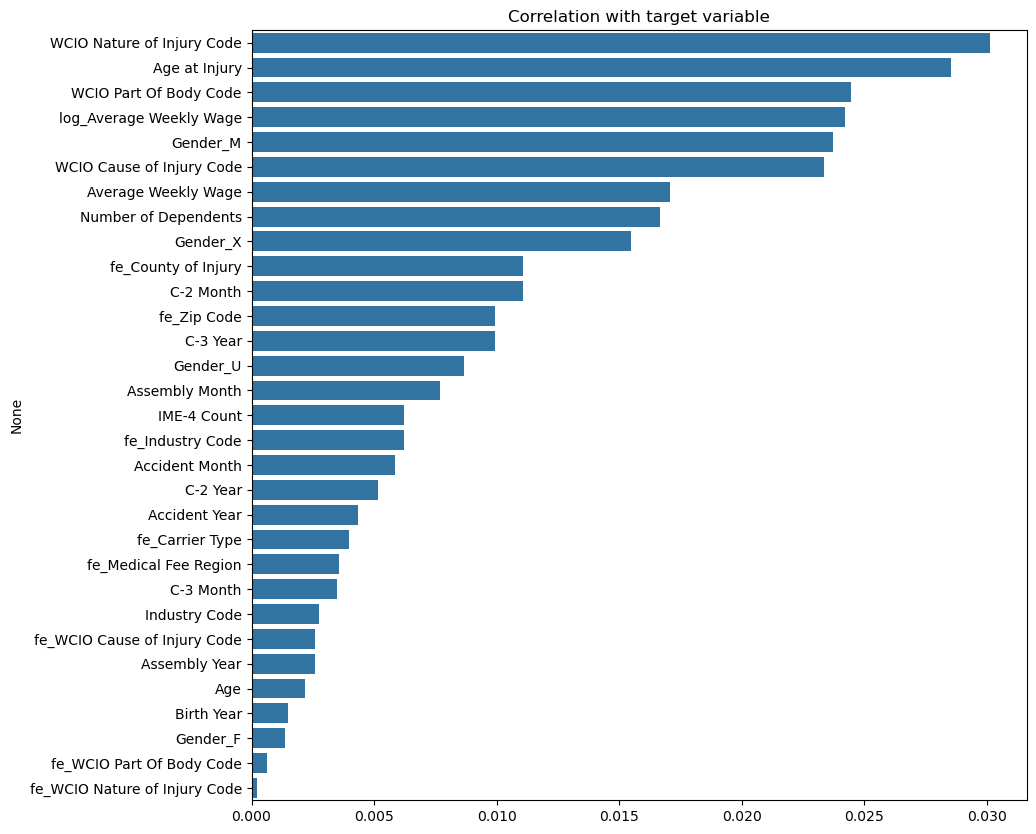

In [17]:
abcorr = np.abs(corr)
abcorr = abcorr.sort_values(ascending=False)

plt.figure(figsize=(10, 10))
sns.barplot(x=abcorr.values, y=corr.index)
plt.title('Correlation with target variable')
plt.show()

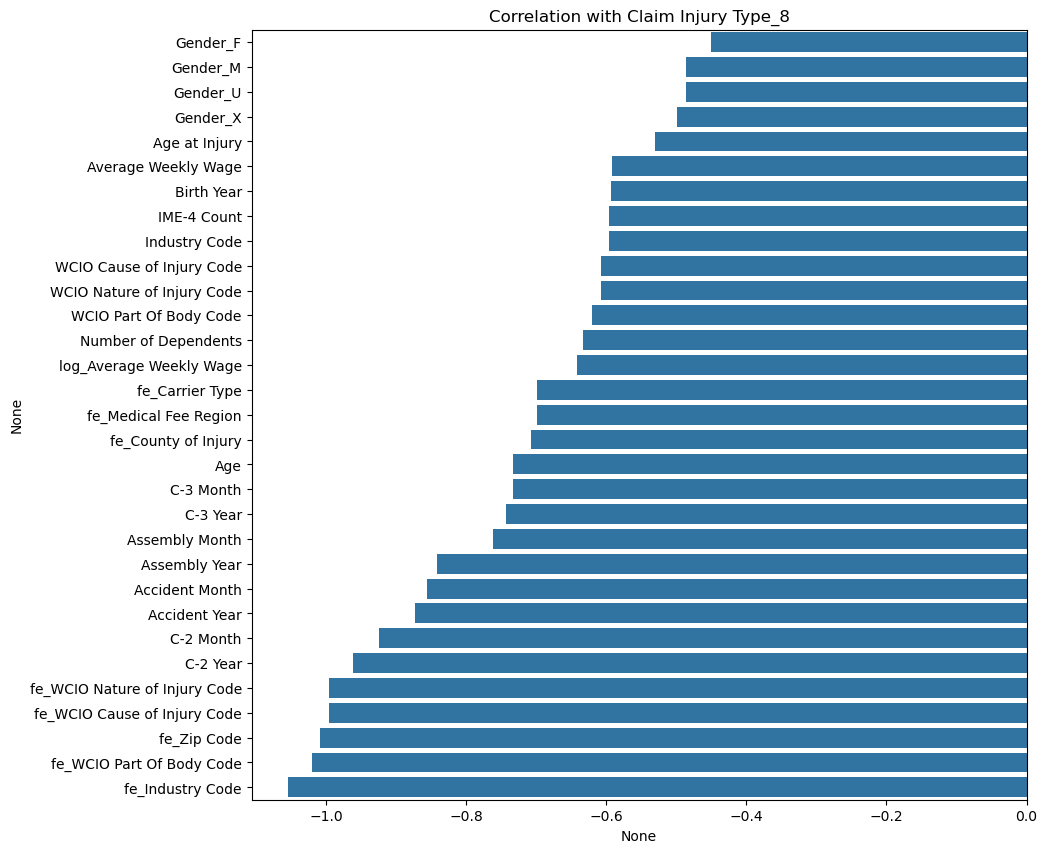

In [18]:
s_corr = []
for col in df_train[num_cols].columns:
    s_col = leo.two_col_entropy_corr(df_train[col], y_hot_train[f'Claim Injury Type_{FEATURENUMBER}'])
    s_col = log((s_col +1)/2)
    s_corr.append(s_col)
    
s_corr = pd.Series(s_corr, index=df_train[num_cols].columns).sort_values(ascending=False)

plt.figure(figsize=(10, 10))
sns.barplot(x=s_corr, y=df_train[num_cols].columns)
plt.title(f'Correlation with Claim Injury Type_{FEATURENUMBER}')
plt.show()

## RFE

In [19]:
# rfe for feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0)
rfe = RFE(rf, n_features_to_select=10)
rfe.fit(df_train[num_cols], y_hot_train[f'Claim Injury Type_{FEATURENUMBER}'])

selected_columns = df_train[num_cols].columns[rfe.support_]

In [20]:
selected_columns

Index(['Age at Injury', 'Average Weekly Wage', 'Birth Year', 'Industry Code',
       'WCIO Part Of Body Code', 'log_Average Weekly Wage',
       'fe_County of Injury', 'C-2 Month', 'fe_WCIO Cause of Injury Code',
       'fe_Zip Code'],
      dtype='object')

## manual selection based on the results of RFE

In [16]:
columns_to_run = ['Age at Injury', 'Average Weekly Wage', 'Birth Year', 'Industry Code',
       'WCIO Part Of Body Code','WCIO Nature of Injury Code',
       'fe_County of Injury', 'Assembly Month', 'fe_Zip Code',
       'fe_WCIO Cause of Injury Code']

# SMOTETomek

In [22]:
#! pip install imblearn

In [17]:
filtered_y_hot = y_hot.loc[df_train.index]
filtered_array = filtered_y_hot[f'Claim Injury Type_{FEATURENUMBER}'].to_numpy()

In [24]:
from imblearn.combine import SMOTETomek

smote_tomek = SMOTETomek(sampling_strategy='auto')

# Assuming you have your feature matrix X and target variable y
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(df_train[columns_to_run], filtered_array)

#smote = SMOTE(sampling_strategy='minority', random_state=42)


print("Resampling completed successfully!")

Resampling completed successfully!


In [23]:
y_train_resampled

array([0., 0., 0., ..., 1., 1., 1.])

In [26]:
len(y_train_resampled)

917692

In [27]:
y_train_resampled_df = pd.Series(y_train_resampled, name=f'Claim Injury Type_{FEATURENUMBER}')
y_train_resampled_df.value_counts()


Claim Injury Type_8
0.0    458846
1.0    458846
Name: count, dtype: int64

## feature selection

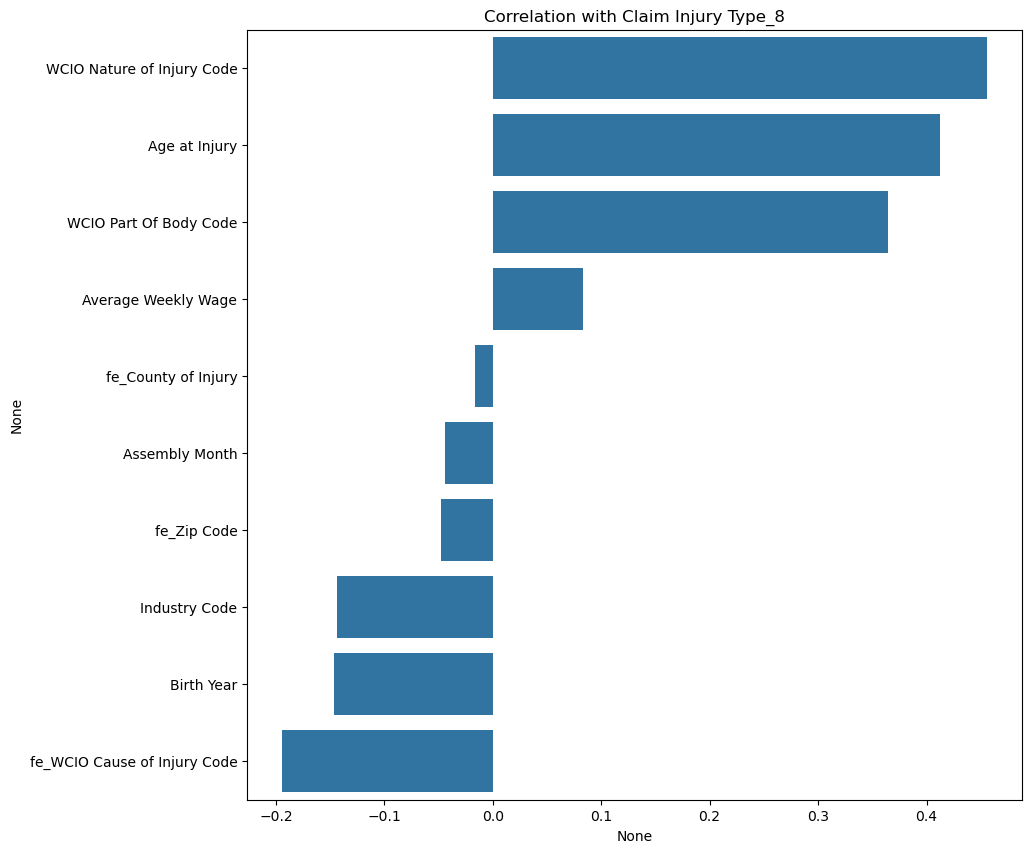

In [28]:
# correlation with target
corr = X_train_resampled.corrwith(y_train_resampled_df)
corr = corr.sort_values(ascending=False)

plt.figure(figsize=(10, 10))
sns.barplot(x=corr, y=corr.index)
plt.title(f'Correlation with Claim Injury Type_{FEATURENUMBER}')
plt.show()


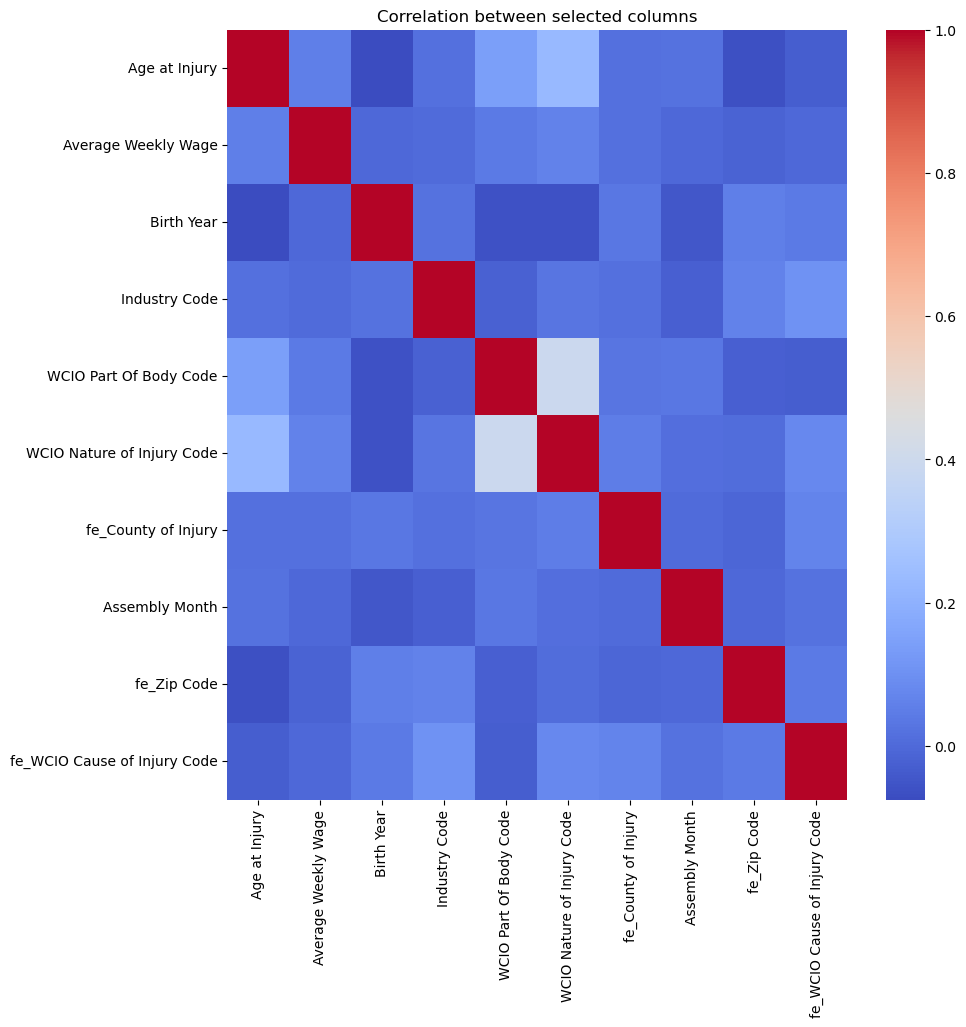

In [29]:
#correation between the selected columns
corr = X_train_resampled.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Correlation between selected columns')
plt.show()

In [30]:
# remove the columns with high correlation
corr_matrix = corr.abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]

<Axes: >

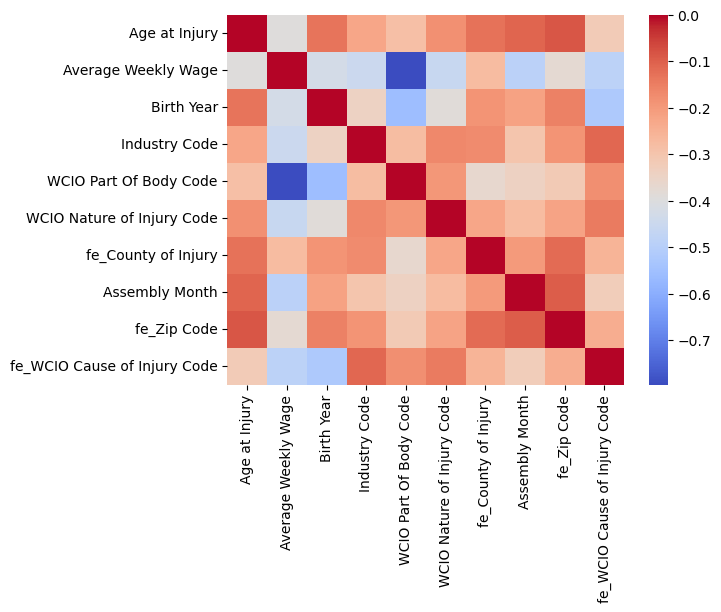

In [31]:
entropy_corr_matrix = leo.entropy_corr(X_train_resampled)
sns.heatmap(entropy_corr_matrix, annot=False, cmap='coolwarm')

# model selection

In [32]:
# evaluate the classifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
model_score = []

### decision tree classifier

Accuracy: 0.996986220232392
Precision: 0.9984213073241033
Recall: 0.996986220232392


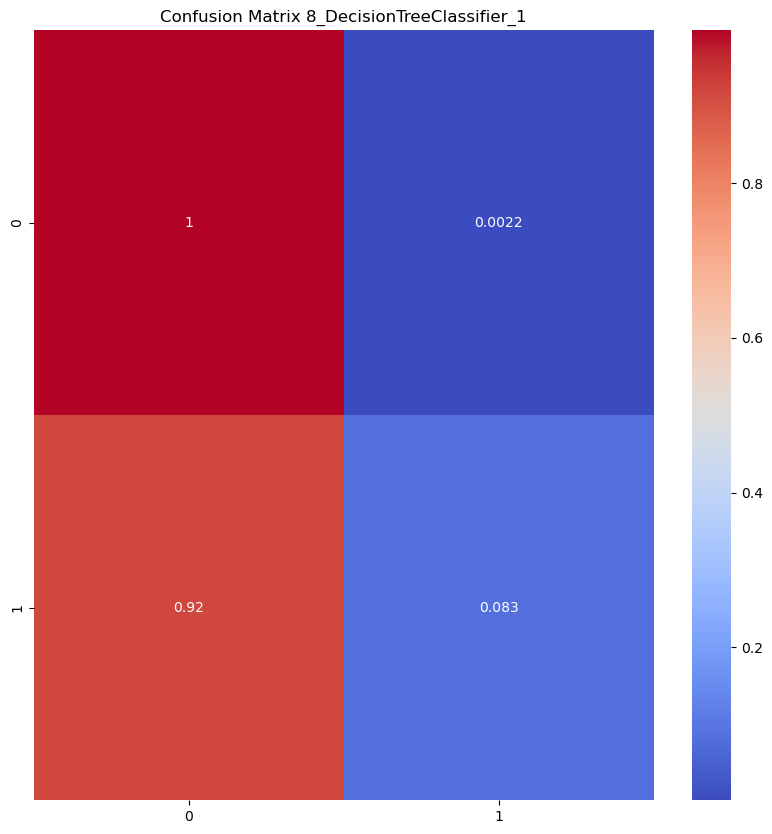

In [33]:
from sklearn.tree import DecisionTreeClassifier
# create a decision tree classifier
DecisionTreeClassifier_1 = DecisionTreeClassifier(random_state=0)

# train the classifier
DecisionTreeClassifier_1.fit(X_train_resampled, y_train_resampled_df)

y_pred_full = DecisionTreeClassifier_1.predict(df_valid[columns_to_run])

accuracy_full  = accuracy_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_full)

f1_full = f1_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_full, average='macro')

cm = confusion_matrix(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_full, normalize='true')

model_score.append(("DecisionTreeClassifier",accuracy_full, f1_full, cm[0][0], cm[0][1], cm[1][0], cm[1][1]))

leo.report_and_save(DecisionTreeClassifier_1,
                    f'{FEATURENUMBER}_DecisionTreeClassifier_1',
                    y_pred_full,
                    y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'],
                    columns_to_run)
                    


Accuracy: 0.8648415588035469
Precision: 0.9986429355201119
Recall: 0.8648415588035469


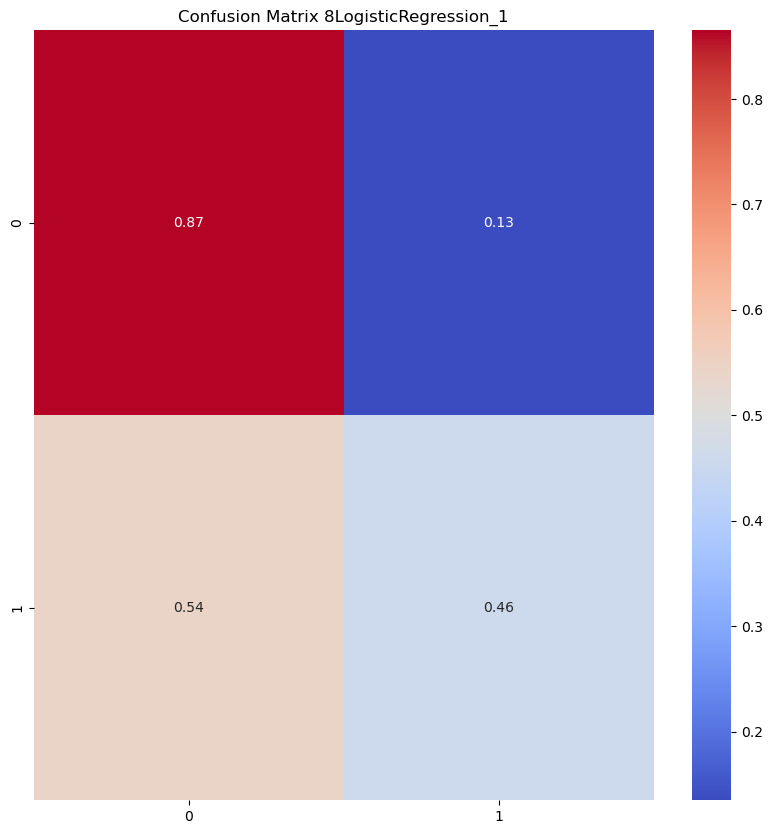

In [34]:
# import logistic regression
from sklearn.linear_model import LogisticRegression

# create a logistic regression classifier
LogisticRegression_1 = LogisticRegression(random_state=0)

# train the classifier
LogisticRegression_1.fit(X_train_resampled,y_train_resampled_df)

y_pred_full = LogisticRegression_1.predict(df_valid[columns_to_run])

accuracy_full  = accuracy_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_full)

f1_full = f1_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_full, average='macro')

cm = confusion_matrix(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_full, normalize='true')


model_score.append(("LogisticRegression",accuracy_full, f1_full, cm[0][0], cm[0][1], cm[1][0], cm[1][1]))

leo.report_and_save(LogisticRegression_1,
                    f'{FEATURENUMBER}LogisticRegression_1',
                    LogisticRegression_1.predict(df_valid[columns_to_run]),
                    y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'],
                    columns_to_run)
                    


### random forest

Accuracy: 0.999050572269742
Precision: 0.9984439734008412
Recall: 0.999050572269742


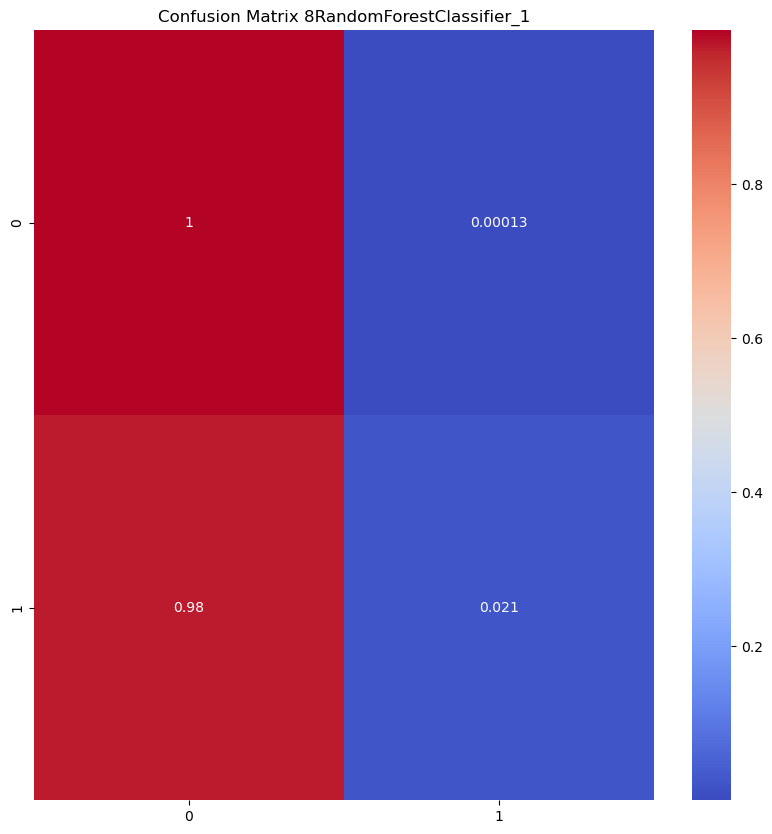

In [35]:
random_state = 42

# import random forest classifier
from sklearn.ensemble import RandomForestClassifier

# create a random forest classifier
RandomForestClassifier_1 = RandomForestClassifier(random_state=random_state)

# train the classifier
RandomForestClassifier_1.fit(X_train_resampled, y_train_resampled_df)

# evaluate the classifier
y_pred_full = RandomForestClassifier_1.predict(df_valid[columns_to_run])

accuracy_full  = accuracy_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_full)

f1_full = f1_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_full, average='macro')

cm = confusion_matrix(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_full, normalize='true')

model_score.append(("RandomForestClassifier",accuracy_full, f1_full, cm[0][0], cm[0][1], cm[1][0], cm[1][1]))

leo.report_and_save(RandomForestClassifier_1,
                    f'{FEATURENUMBER}RandomForestClassifier_1',
                    y_pred_full,
                    y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'],
                    columns_to_run)



# XGBoost

Accuracy: 0.9905492744281658
Precision: 0.9985317412755979
Recall: 0.9905492744281658


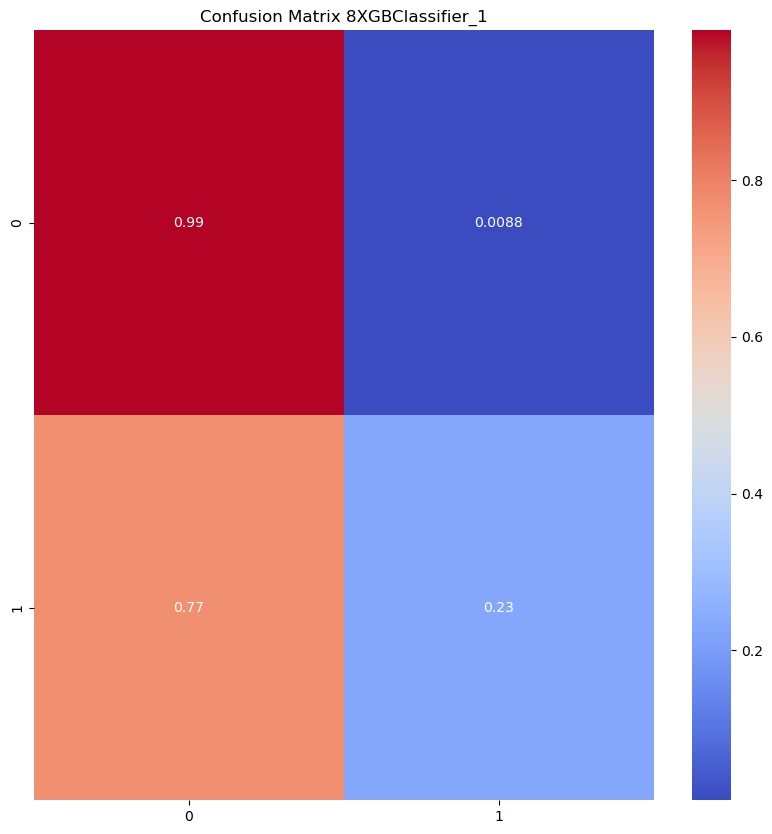

In [36]:
import xgboost 
from xgboost import XGBClassifier

# create a xgboost classifier
XGBClassifier_1 = XGBClassifier(random_state=random_state)
XGBClassifier_selected = XGBClassifier(random_state=random_state)
XGBClassifier_selected_2 = XGBClassifier(random_state=random_state)

# train the classifier
XGBClassifier_1.fit(X_train_resampled, y_train_resampled_df)

# evaluate the classifier
y_pred_full = XGBClassifier_1.predict(df_valid[columns_to_run])

accuracy_full  = accuracy_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_full)

f1_full = f1_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_full, average='macro')

cm = confusion_matrix(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_full, normalize='true')

model_score.append(("XGBClassifier",accuracy_full, f1_full, cm[0][0], cm[0][1], cm[1][0], cm[1][1]))

leo.report_and_save(XGBClassifier_1,
                    f'{FEATURENUMBER}XGBClassifier_1',
                    y_pred_full,
                    y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'],
                    columns_to_run)


# LightGBM

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 458846, number of negative: 458846
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003194 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 917692, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Accuracy: 0.9923000540041461
Precision: 0.9985662919120231
Recall: 0.9923000540041461


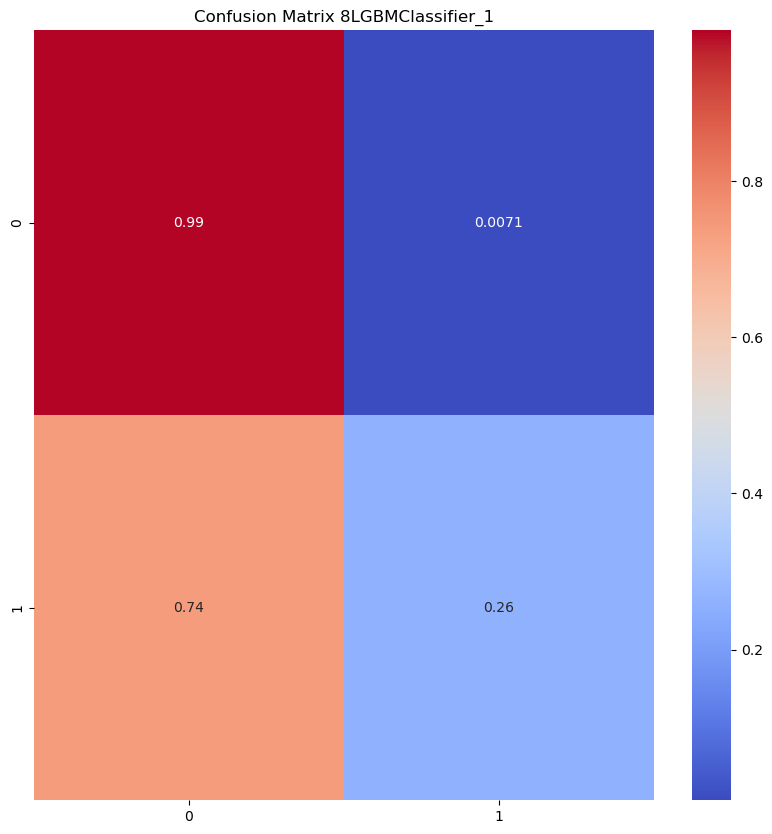

In [37]:
# import lightgbm classifier
from lightgbm import LGBMClassifier

# create a lightgbm classifier
LGBMClassifier_1 = LGBMClassifier(random_state=random_state)

# train the classifier
LGBMClassifier_1.fit(X_train_resampled, y_train_resampled_df)

# evaluate the classifier
y_pred_full = LGBMClassifier_1.predict(df_valid[columns_to_run])

accuracy_full  = accuracy_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_full)

f1_full = f1_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_full, average='macro')

cm = confusion_matrix(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_full, normalize='true')

model_score.append(("LGBMClassifier",accuracy_full, f1_full, cm[0][0], cm[0][1], cm[1][0], cm[1][1]))

leo.report_and_save(LGBMClassifier_1, f'{FEATURENUMBER}LGBMClassifier_1', y_pred_full, y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], columns_to_run)


Accuracy: 0.9821263697019319
Precision: 0.9984157278433295
Recall: 0.9821263697019319


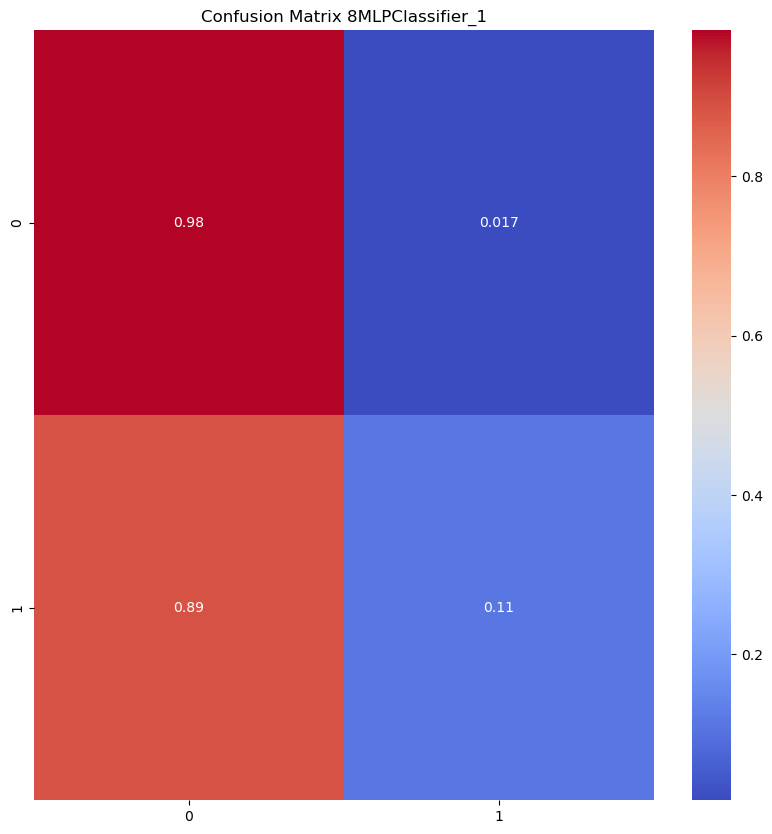

In [38]:
# multillayer perceptron
from sklearn.neural_network import MLPClassifier

# create a multilayer perceptron classifier
MLPClassifier_1 = MLPClassifier(random_state=random_state)

# train the classifier
MLPClassifier_1.fit(X_train_resampled, y_train_resampled_df)

# evaluate the classifier
y_pred_full = MLPClassifier_1.predict(df_valid[columns_to_run])

accuracy_full  = accuracy_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_full)

f1_full = f1_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_full, average='macro')

cm = confusion_matrix(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_full, normalize='true')

model_score.append(("MLPClassifier",accuracy_full, f1_full, cm[0][0], cm[0][1], cm[1][0], cm[1][1]))

leo.report_and_save(MLPClassifier_1, f'{FEATURENUMBER}MLPClassifier_1', y_pred_full, y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], columns_to_run)


In [39]:
for x in model_score:
    print(x)

('DecisionTreeClassifier', 0.996986220232392, np.float64(0.5213448128355134), np.float64(0.9977508499694883), np.float64(0.002249150030511725), np.float64(0.9166666666666666), np.float64(0.08333333333333333))
('LogisticRegression', 0.8648415588035469, np.float64(0.46656612206417675), np.float64(0.8651817627059541), np.float64(0.13481823729404585), np.float64(0.5416666666666666), np.float64(0.4583333333333333))
('RandomForestClassifier', 0.999050572269742, np.float64(0.5174616412426191), np.float64(0.9998692354633424), np.float64(0.00013076453665765845), np.float64(0.9791666666666666), np.float64(0.020833333333333332))
('XGBClassifier', 0.9905492744281658, np.float64(0.5171119149573072), np.float64(0.9911864702292739), np.float64(0.00881352977072618), np.float64(0.7708333333333334), np.float64(0.22916666666666666))
('LGBMClassifier', 0.9923000540041461, np.float64(0.5248337464798365), np.float64(0.9929125621131549), np.float64(0.007087437886845087), np.float64(0.7395833333333334), np.fl

In [40]:
"""# svm classifier
from sklearn.svm import SVC

# create a svm classifier
SVC_1 = SVC(random_state=random_state)
SVC_selected = SVC(random_state=random_state)
SVC_selected_2 = SVC(random_state=random_state)

# train the classifier
SVC_1.fit(df_train[num_cols], y_hot_train[f'Claim Injury Type_{FEATURENUMBER}'])
SVC_selected.fit(df_train[selected_cols], y_hot_train[f'Claim Injury Type_{FEATURENUMBER}'])
SVC_selected_2.fit(df_train[selected_cols_2], y_hot_train[f'Claim Injury Type_{FEATURENUMBER}'])

# evaluate the classifier
y_pred_full = SVC_1.predict(df_valid[num_cols])
y_pred_selected = SVC_selected.predict(df_valid[selected_cols])
y_pred_selected_2 = SVC_selected_2.predict(df_valid[selected_cols_2])

accuracy_full  = accuracy_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_full)
accuracy_selected = accuracy_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected)
accuracy_selected_2 = accuracy_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected_2)

f1_full = f1_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_full, average='macro')
f1_selected = f1_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected, average='macro')
f1_selected_2 = f1_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected_2, average='macro')

model_full.append(("SVC",accuracy_full, f1_full))
model_selected.append(("SVC",accuracy_selected, f1_selected))
model_selected_2.append(("SVC",accuracy_selected_2, f1_selected_2))

"""

'# svm classifier\nfrom sklearn.svm import SVC\n\n# create a svm classifier\nSVC_1 = SVC(random_state=random_state)\nSVC_selected = SVC(random_state=random_state)\nSVC_selected_2 = SVC(random_state=random_state)\n\n# train the classifier\nSVC_1.fit(df_train[num_cols], y_hot_train[f\'Claim Injury Type_{FEATURENUMBER}\'])\nSVC_selected.fit(df_train[selected_cols], y_hot_train[f\'Claim Injury Type_{FEATURENUMBER}\'])\nSVC_selected_2.fit(df_train[selected_cols_2], y_hot_train[f\'Claim Injury Type_{FEATURENUMBER}\'])\n\n# evaluate the classifier\ny_pred_full = SVC_1.predict(df_valid[num_cols])\ny_pred_selected = SVC_selected.predict(df_valid[selected_cols])\ny_pred_selected_2 = SVC_selected_2.predict(df_valid[selected_cols_2])\n\naccuracy_full  = accuracy_score(y_hot_valid[f\'Claim Injury Type_{FEATURENUMBER}\'], y_pred_full)\naccuracy_selected = accuracy_score(y_hot_valid[f\'Claim Injury Type_{FEATURENUMBER}\'], y_pred_selected)\naccuracy_selected_2 = accuracy_score(y_hot_valid[f\'Claim In

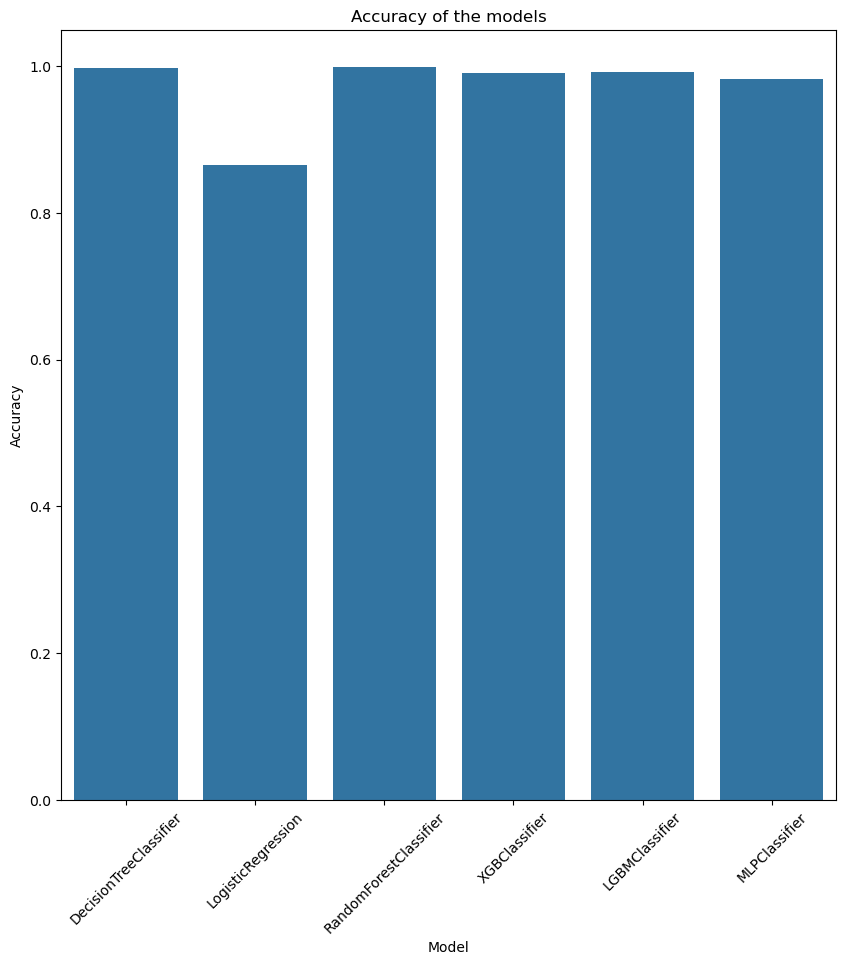

In [41]:
# plotting the results
model_full = pd.DataFrame(model_score, columns=['Model', 'Accuracy', 'F1','TN','FP','FN','TP'])

plt.figure(figsize=(10, 10))
sns.barplot(x='Model', y='Accuracy', data=model_full)
plt.title('Accuracy of the models')
plt.xticks(rotation=45)
plt.show()

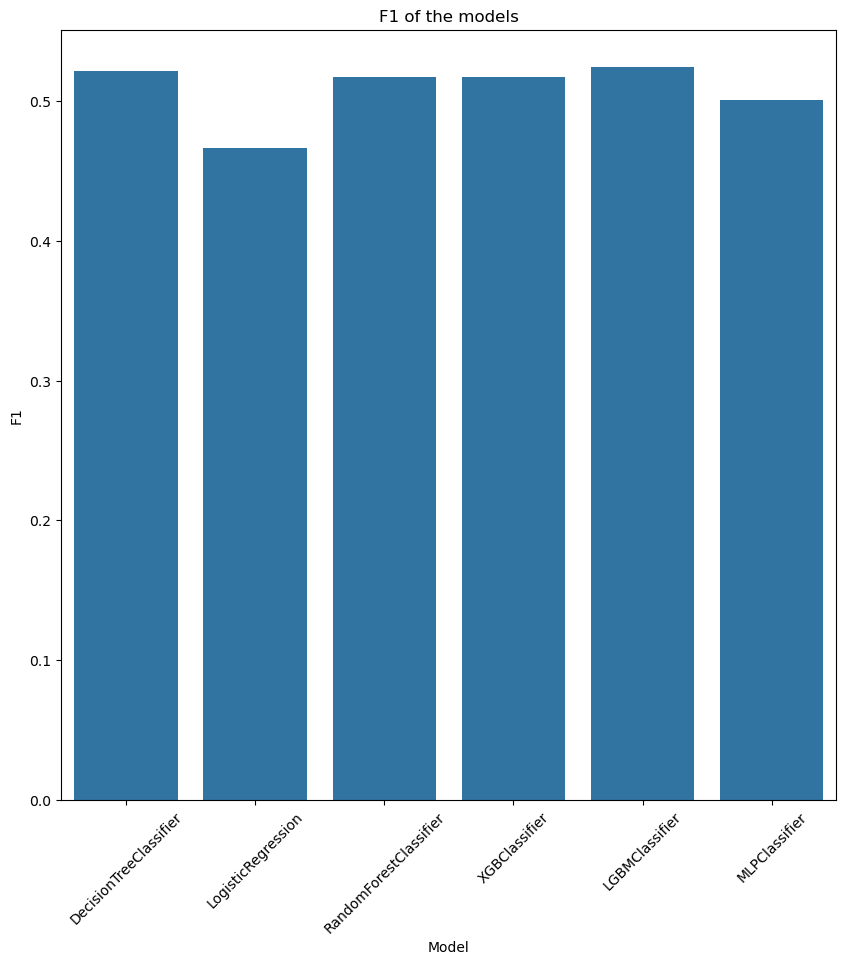

In [42]:
plt.figure(figsize=(10, 10))
sns.barplot(x='Model', y='F1', data=model_full)
plt.title('F1 of the models')
plt.xticks(rotation=45)
plt.show()

# 

# plot th true negative

In [43]:
df_model_score = pd.DataFrame(model_score, columns=['Model', 'Accuracy', 'F1','TN','FP','FN','TP'], index = [x[0] for x in model_score])

In [44]:
df_model_score[['TN','FN']]

,TN,FN
DecisionTreeClassifier,0.997751,0.916667
LogisticRegression,0.865182,0.541667
RandomForestClassifier,0.999869,0.979167
XGBClassifier,0.991186,0.770833
LGBMClassifier,0.992913,0.739583
MLPClassifier,0.982852,0.885417


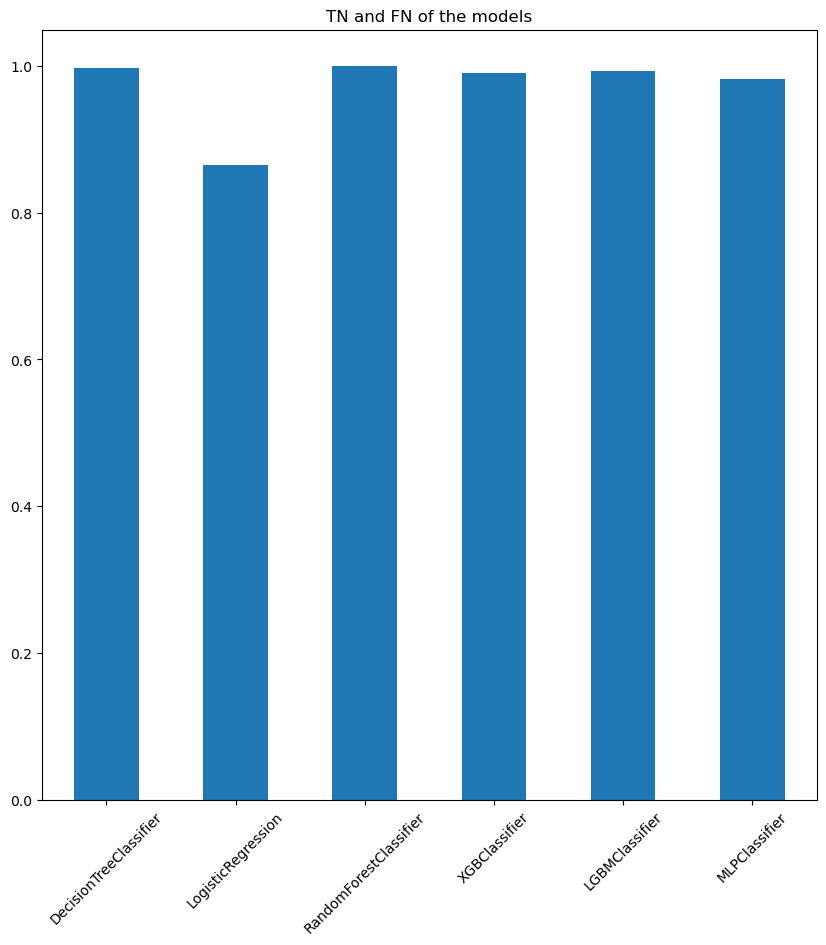

In [45]:
# plot the tn and tp one next to the other for comparison

plt.figure(figsize=(10, 10))
df_model_score['TN'].plot(kind='bar')
plt.title('TN and FN of the models')
plt.xticks(rotation=45)
plt.show()


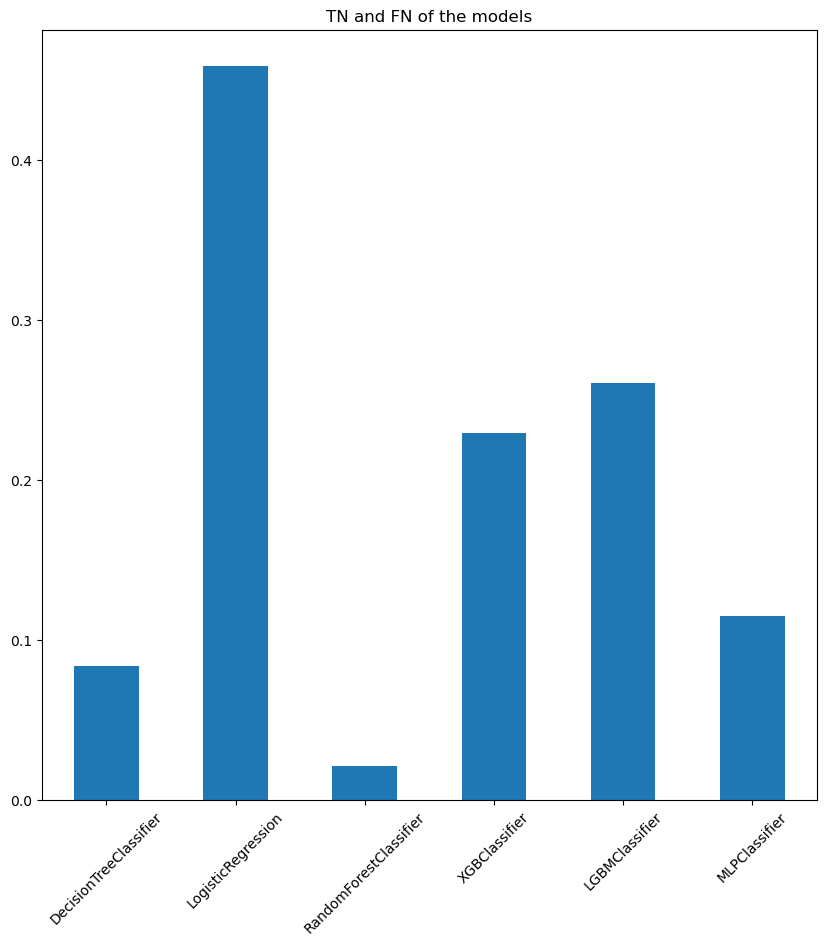

In [46]:
plt.figure(figsize=(10, 10))
df_model_score['TP'].plot(kind='bar')
plt.title('TN and FN of the models')
plt.xticks(rotation=45)
plt.show()


In [47]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import PredefinedSplit

In [ ]:
# split the training data for hyperparameter tuning

In [ ]:
# do grid search for the best parameters in logistic regression
from sklearn.model_selection import GridSearchCV
# import logistic regression
from sklearn.linear_model import LogisticRegression
# import train test split
from sklearn.model_selection import train_test_split
# import accuracy score
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, mo

In [ ]:
# create a logistic regression classifier
model_final = LogisticRegression(random_state=0)

# Reduce the training data
X_train_small, _, y_train_small, _ = train_test_split(X_train_resampled, y_train_resampled_df, train_size=0.1, stratify=y_train_resampled_df, random_state=0)


# Define the grid
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'penalty': ['l1', 'l2'],
              'solver': ['liblinear']}


# create a grid search object
grid_search = GridSearchCV(model_final, param_grid, cv=5)

# train the classifier
grid_search.fit(X_train_small, y_train_small)

# evaluate the classifier
y_pred_full = grid_search.predict(df_valid[columns_to_run])

accuracy_full  = accuracy_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_full)

f1_full = f1_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_full, average='macro')

cm = confusion_matrix(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_full, normalize='true')



NameError: name 'model_score' is not defined

Accuracy: 0.7719021653920527
Precision: 0.9989518980789589
Recall: 0.7719021653920527


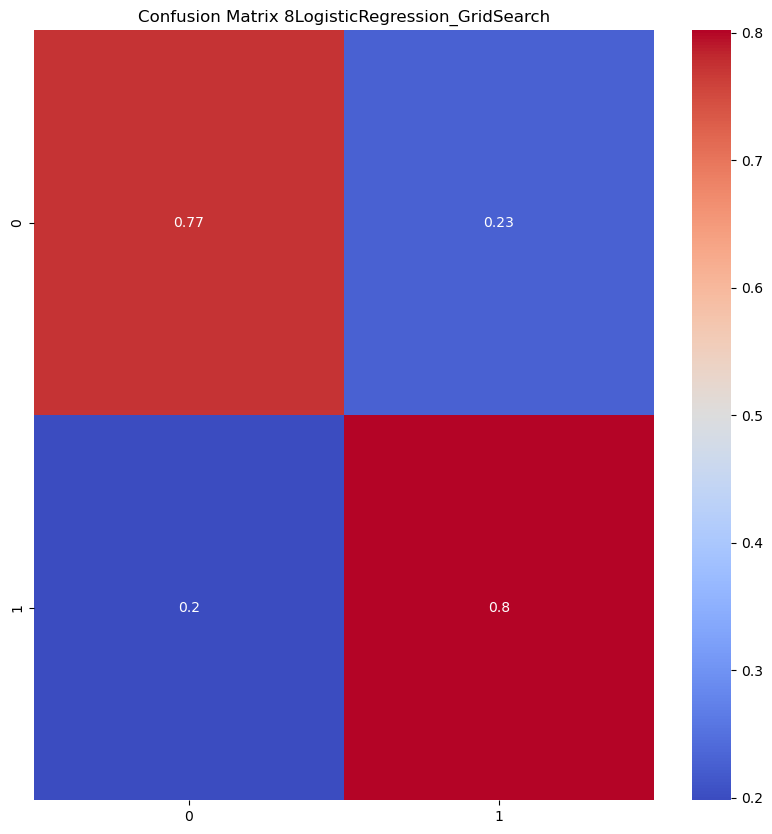

In [32]:
leo.report_and_save(grid_search, f'{FEATURENUMBER}LogisticRegression_GridSearch', y_pred_full, y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], columns_to_run)


In [ ]:
# get the best parameters
grid_search.best_params_

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# data partition
from sklearn.model_selection import train_test_split

#filter methods
# spearman 
# chi-square
import scipy.stats as stats
from scipy.stats import chi2_contingency

#wrapper methods
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import RFE


# embedded methods
from sklearn.linear_model import LassoCV

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#no of features
nof_list=np.arange(1,8)            
high_score=0
#Variable to store the optimum features
nof=0           
train_score_list =[]
val_score_list = []

for n in range(len(nof_list)):
    model = LogisticRegression()   
    #create RFE instance
    rfe = RFE(estimator = model,n_features_to_select = nof_list[n])
    
    #fit and transform for training data, transform for val data
    X_train_rfe = rfe.fit_transform(X_train_resampled,type7)
    X_val_rfe = rfe.transform(df_valid[selected_cols_2_ordered])
    
    model.fit(X_train_rfe,type7)
    
    #storing results on training data
    train_score = model.score(X_train_rfe,type7)
    train_score_list.append(train_score)
    
    #storing results on training data
    val_score = model.score(X_val_rfe,type7_val)
    val_score_list.append(val_score)
    
    #check best score
    if(val_score > high_score):
        high_score = val_score
        nof = nof_list[n]
        
        #adding mention of variables to keep
        features_to_select = pd.Series(rfe.support_, index = X_train_resampled.columns)
        
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))
print(f"Features to select: \n{features_to_select}")

In [ ]:
#######################################
######## K-Nearest Neighbors
#######################################
modelxg = XGBClassifier()

params = {
        'max_depth': [3, 5, 7],
        'learning_rate': [0.1, 0.01, 0.001],
        'subsample': [0.5, 0.7, 1],
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

                   
# with GridSearch
grid_search_lxg = GridSearchCV(
    estimator=modelxg,
    param_grid=params,
    scoring = 'f1_macro',
    verbose=1)

In [ ]:
grid_results = grid_search_lxg.fit(X = X_train_resampled, y = type7)

In [ ]:
#Parameter setting that gave the best results on the hold out data.
print(grid_results.best_params_ ) 

In [ ]:
#Mean cross-validated score of the best_estimator
print('Best Score - KNN:', grid_results.best_score_ )

Best Model

In [ ]:
final_model = modelxg.set_params(**grid_results.best_params_)

In [ ]:
final_model.fit(X_train_resampled, type7)

In [ ]:
labels_val = final_model.predict(df_valid[selected_cols_2_ordered])

In [ ]:
print(classification_report(type7_val, labels_val))

In [ ]:
print(confusion_matrix(type7_val, labels_val))

In [ ]:
report_and_save(final_model, f'{FEATURENUMBER}final_model', labels_val, type7_val)

In [ ]:
best_parameters = {'colsample_bytree': 1.0, 'gamma': 2, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'subsample': 0.6}